<a href="https://colab.research.google.com/github/julianacosta55/Juliana-Costa/blob/master/emocoes_treinamento_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1477 images belonging to 6 classes.
Found 367 images belonging to 6 classes.
Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 96s 510ms/step - accuracy: 0.4677 - loss: 1.1117 - val_accuracy: 0.5613 - val_loss: 0.9330
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6438 - loss: 0.8315 - val_accuracy: 0.6158 - val_loss: 0.8026
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6906 - loss: 0.7365 - val_accuracy: 0.6594 - val_loss: 0.7791
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7123 - loss: 0.6677 - val_accuracy: 0.7330 - val_loss: 0.6776
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.7775 - loss: 0.5365 - val_accuracy: 0.7357 - val_loss: 0.6510


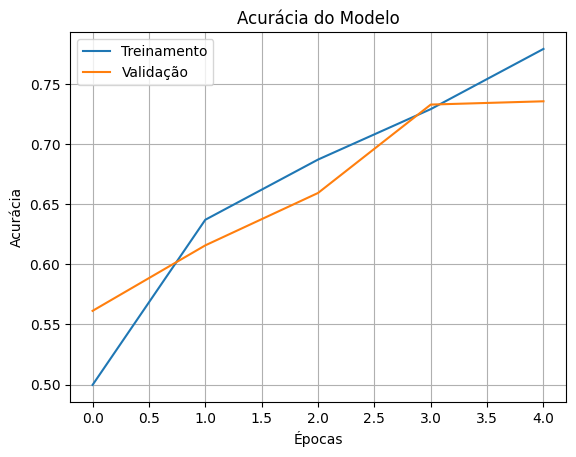

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Emoção detectada: happy


In [17]:
# =======================
# ETAPA 1 – INSTALAR & IMPORTAR BIBLIOTECAS
# =======================
# TensorFlow:
!pip install tensorflow

# Bibliotecas essenciais
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import os

# =======================
# ETAPA 2 – CONECTAR AO GOOGLE DRIVE
# =======================
from google.colab import drive
drive.mount('/content/drive')

# =======================
# ETAPA 3 – DEFINIR O CAMINHO DAS IMAGENS
# =======================
# Caminho para pasta com subpastas: happy/, sad/, angry/, etc.
# Ex: '/content/drive/MyDrive/emocoes_treinamento'
path = '/content/drive/MyDrive/emocoes_treinamento'

# =======================
# ETAPA 4 – PREPARAR OS DADOS
# =======================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% treino / 20% validação
)

train_data = datagen.flow_from_directory(
    path,
    target_size=(48, 48),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    path,
    target_size=(48, 48),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

# =======================
# ETAPA 5 – DEFINIR A REDE NEURAL CONVOLUCIONAL
# =======================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')  # uma saída por classe (emoção)
])

# =======================
# ETAPA 6 – COMPILAR O MODELO
# =======================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =======================
# ETAPA 7 – TREINAR O MODELO
# =======================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5  # pode ajustar para mais se tiver tempo
)

# =======================
# ETAPA 8 – VISUALIZAR RESULTADOS
# =======================
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# =======================
# ETAPA 9 – TESTAR COM UMA NOVA IMAGEM
# =======================
# Exemplo: teste com imagem nova de expressão

img_path = '/content/drive/MyDrive/emocoes_treinamento/happy/happy_1.jpg'  # altere conforme o local

# Carregar e preparar a imagem
img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1, 48, 48, 1)

# Fazer a predição
prediction = model.predict(img_array)
classes = list(train_data.class_indices.keys())
print("Emoção detectada:", classes[np.argmax(prediction)])